# UIUC GHG Emissions

This notebook shows the emissions from UIUC by year and by goal. 

The data is not available in a downloadable format but can be accessed [here](https://icap.sustainability.illinois.edu/metric/total-campus-ghg-emissions). 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


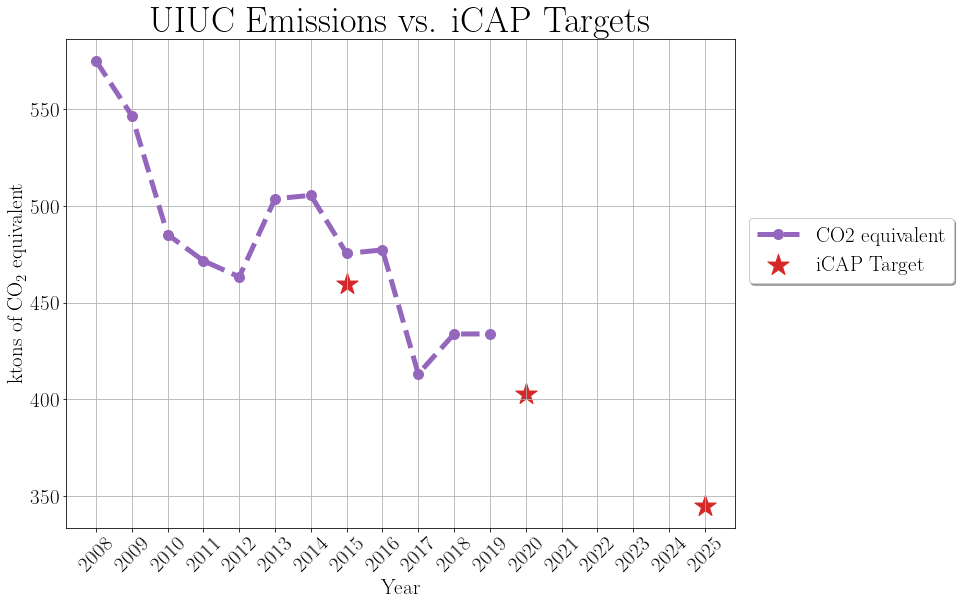

In [12]:
# years of available data
years = np.arange(2008, 2020, 1).astype(int)
goalyr = np.arange(2008, 2026, 1).astype(int)
# in ktons of CO2eq
emissions = np.array([575.088, 546.778, 485.208, 471.628, 463.343, 503.747, 505.503, 
                      475.418, 477.287, 413.106, 433.751, 433.797])
goals = {2015:459.875, 2020:402.562, 2025:344.906}

plt.plot(years, emissions, label="CO2 equivalent", marker='o', lw=5, linestyle='--', 
         color='tab:purple', markersize=10)
plt.scatter(goals.keys(), goals.values(), label='iCAP Target', marker='*', s=500, color='tab:red')
plt.title("UIUC Emissions vs. iCAP Targets", fontsize=36)
plt.ylabel("ktons of CO$_2$ equivalent", fontsize=21)
plt.yticks(fontsize=21)
plt.xlabel("Year", fontsize=21)
plt.xticks(goalyr, fontsize=21, rotation=45)
plt.grid(which='major')
plt.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=21,prop={'size': 21})
# plt.show()
plt.savefig("../publications/papers/optimal-sizing-paper/images/icap_goals.pgf")
plt.savefig("../publications/papers/optimal-sizing-paper/images/icap_goals.eps", bbox_inches='tight')

We have to interpolate the goals for years not listed by iCAP

In [8]:
data = np.empty(36)
data[:] = np.NaN
data[0] = 459.875
data[5] = 402.562
data[10] = 344.906
data[-1] = 0.0

In [9]:
icap_df = pd.DataFrame({'year':np.arange(2015,2051,1), 'goal':data})

In [10]:
icap_df['goal'] = icap_df['goal'].interpolate(method='linear')

In [11]:
mask = (icap_df['year'] <= 2050) & (icap_df['year'] >= 2021)
icap_df[mask]

,year,goal
6,2021,391.03080
7,2022,379.49960
8,2023,367.96840
9,2024,356.43720
10,2025,344.90600
11,2026,331.10976
12,2027,317.31352
13,2028,303.51728
14,2029,289.72104
15,2030,275.92480


## Consider the case for strong climate policy in Illinois -- Imported Electricity will have zero carbon emissions by 2030.

In [6]:
import numpy as np
import pandas as pd
data = np.empty(10)
data[:] = np.NaN
data[0] = 0.825
data[-1] = 0.0
ceja_df = pd.DataFrame({'year':np.arange(2021,2031,1), 'goal':data})
ceja_df['goal'] = ceja_df['goal'].interpolate(method='linear')
ceja_df

,year,goal
0,2021,0.825000
1,2022,0.733333
2,2023,0.641667
3,2024,0.550000
4,2025,0.458333
5,2026,0.366667
6,2027,0.275000
7,2028,0.183333
8,2029,0.091667
9,2030,0.000000
